In [20]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA

In [2]:
%load_ext autoreload
%autoreload 1
%aimport main
%aimport data_utils
%aimport contrastive_data
%aimport models

In [3]:
from contrastive_data import *
from data_utils import *
from main import *
from models import *

# Data and model

In [4]:
data_path = '/home/lguirardel/data/perturb_comp/data/TP53/'

In [5]:
paths = get_paths(data_path)
counts = load_data(*paths)

	Reading files...
	Merging and processing...
		100 variant classes
['G105C' 'H179Y' 'P153P' 'H214R' 'V272M' 'T312S' 'P36P' 'C277F' 'R213Q'
 'R249M' 'E339K' 'C135F' 'V216M' 'C275F' 'A83V' 'H193Y' 'I195T' 'C242F'
 'T170T' 'Y236C' 'P250L' 'R158L' 'A159V' 'M246V' 'R249S' 'P47P' 'R248W'
 'V31I' 'C135Y' 'Q5R' 'R158H' 'S241C' 'G360V' 'P151S' 'G266E' 'L344L'
 'R337L' 'R158R' 'E285K' 'C275Y' 'D21D' 'Y234C' 'G266V' 'R110L' 'L194R'
 'V173L' 'R175H' 'R273H' 'R273L' 'G245C' 'P295P' 'T118T' 'R273C' 'H193L'
 'K132R' 'P301P' 'V216V' 'C238Y' 'R282W' 'unassigned' 'P222P' 'R337C'
 'S241F' 'P278S' 'G245D' 'P47S' 'M237I' 'H193R' 'E2E' 'Y163C' 'R248L'
 'C141Y' 'P359P' 'WT' 'C176Y' 'E286K' 'C238F' 'G244C' 'G245S' 'R280T'
 'Y107H' 'P278L' 'G154V' 'V272L' 'H179R' 'S127F' 'G245V' 'G266R' 'C176F'
 'V157F' 'E271K' 'A159P' 'R280K' 'Y220C' 'Y205C' 'P152L' 'P58R' 'V173M'
 'S366A' 'K132N']


Run from here to re-split without reloading all data (will be necessary if wtlike is changed however)

In [8]:
run_name = 'bs_256_wtlike'
dir_name = join('models',run_name)
! cat models/{run_name}/config.ini

restart = true
batch-size = 256
lr = 0.001
loss = standard
margin = 1
alpha = 0.01
weight-decay = 0.01
n-epochs = 500


In [41]:
df_train, df_seen, df_unseen = load_split(join(dir_name, 'split'), counts, )
df_dict = {
    'train':df_train,
    'seen':df_seen,
    'unseen':df_unseen,
}

In [11]:
dl_train, dl_seen, dl_unseen = split(counts, )

Train length: 47565
Seen test length  : 15855
Unseen test length: 21358


In [14]:
model = torch.load(join(dir_name,'model.pkl'), map_location='cpu')

# Embedding distribution

In [25]:
make_dir_if_needed(f'plots/embeds/{run_name}')

In [36]:
subset = 'seen'
df = df_seen

X = torch.tensor(df.drop(columns=['variant','Variant functional class']).to_numpy(), dtype=torch.float32)
embeds = []
for i,x in enumerate(X):
    with torch.no_grad():
        embeds.append(model.network.forward(x))
embeds = torch.stack(embeds)

/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

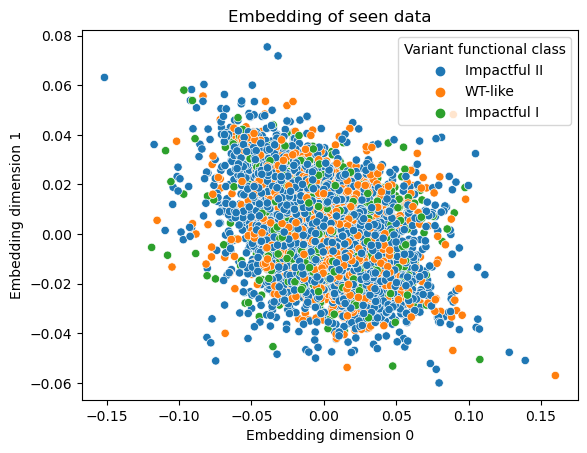

In [37]:
i,j = 0,1
sns.scatterplot(x=embeds[:,i], y=embeds[:,j], hue = df['Variant functional class'])
plt.xlabel(f'Embedding dimension {i}')
plt.ylabel(f'Embedding dimension {j}')
plt.title(f'Embedding of {subset} data')
plt.savefig(f'plots/embeds/{run_name}/{subset}_embed_{i}_{j}_scatter.pdf')

/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

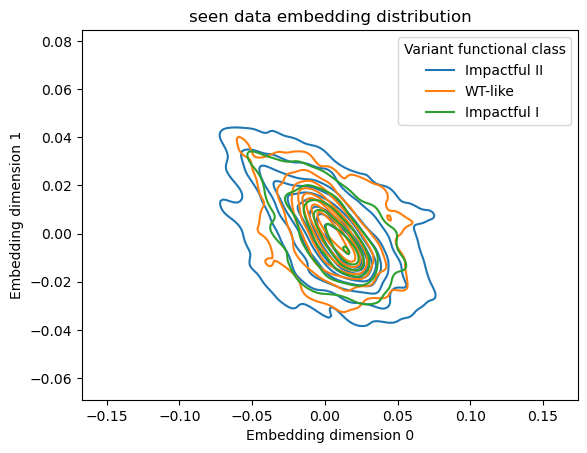

In [38]:
sns.kdeplot(x=embeds[:,i], y=embeds[:,j], hue = df['Variant functional class'])
plt.xlabel(f'Embedding dimension {i}')
plt.ylabel(f'Embedding dimension {j}')
plt.title(f'{subset} data embedding distribution')
plt.savefig(f'plots/embeds/{run_name}/{subset}_embed_{i}_{j}_kde.pdf')

Explained variance : 99.7 %


/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

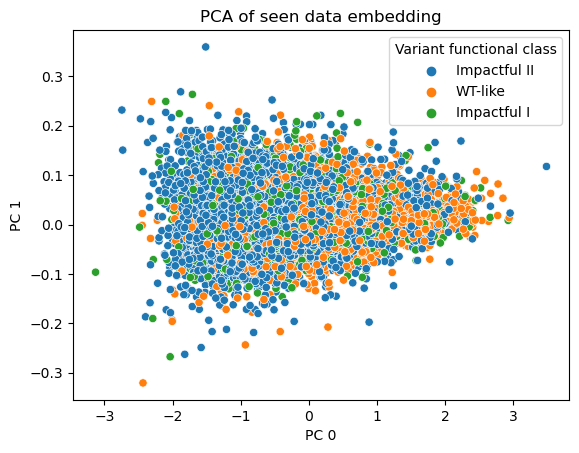

In [39]:
pca = PCA(2)
emb_red = pca.fit_transform(embeds)
print(f'Explained variance : {(pca.explained_variance_ratio_).sum()*100:.1f} %')
sns.scatterplot(x=emb_red[:,0], y=emb_red[:,1], hue = df['Variant functional class'])
plt.xlabel(f'PC 0')
plt.ylabel(f'PC 1')
plt.title(f'PCA of {subset} data embedding')
plt.savefig(f'plots/embeds/{run_name}/{subset}_embed_pca_scatter.pdf')

/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lguirardel/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

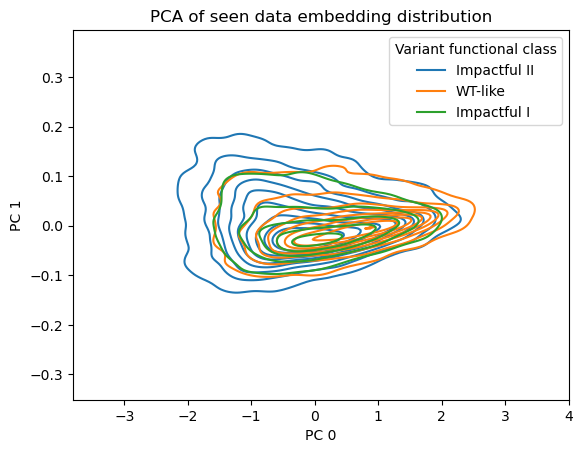

In [42]:
sns.kdeplot(x=emb_red[:,0], y=emb_red[:,1], hue = df['Variant functional class'])
plt.xlabel(f'PC 0')
plt.ylabel(f'PC 1')
plt.title(f'PCA of {subset} data embedding distribution' )
plt.savefig(f'plots/embeds/{run_name}/{subset}_embed_pca_kde.pdf')